<a href="https://colab.research.google.com/github/Samrudhm001/Machine-learning-projects/blob/main/Ckd_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [87]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [88]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [89]:
df=pd.read_csv('/content/gdrive/MyDrive/kidney_disease.csv')

In [90]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [91]:
df.drop('id', axis = 1, inplace = True)

In [92]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [93]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [94]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [96]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [97]:
for col in cat_cols:
  print(f"{col} has {df[col].unique()} values")

red_blood_cells has [nan 'normal' 'abnormal'] values
pus_cell has ['normal' 'abnormal' nan] values
pus_cell_clumps has ['notpresent' 'present' nan] values
bacteria has ['notpresent' 'present' nan] values
hypertension has ['yes' 'no' nan] values
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values
coronary_artery_disease has ['no' 'yes' '\tno' nan] values
appetite has ['good' 'poor' nan] values
peda_edema has ['no' 'yes' nan] values
aanemia has ['no' 'yes' nan] values
class has ['ckd' 'ckd\t' 'notckd'] values


In [98]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [99]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has ['ckd' 'not ckd'] values



In [100]:
import seaborn as sns

<ipython-input-101-11b7b3477b8c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-101-11b7b3477b8c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-101-11b7b3477b8c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed i

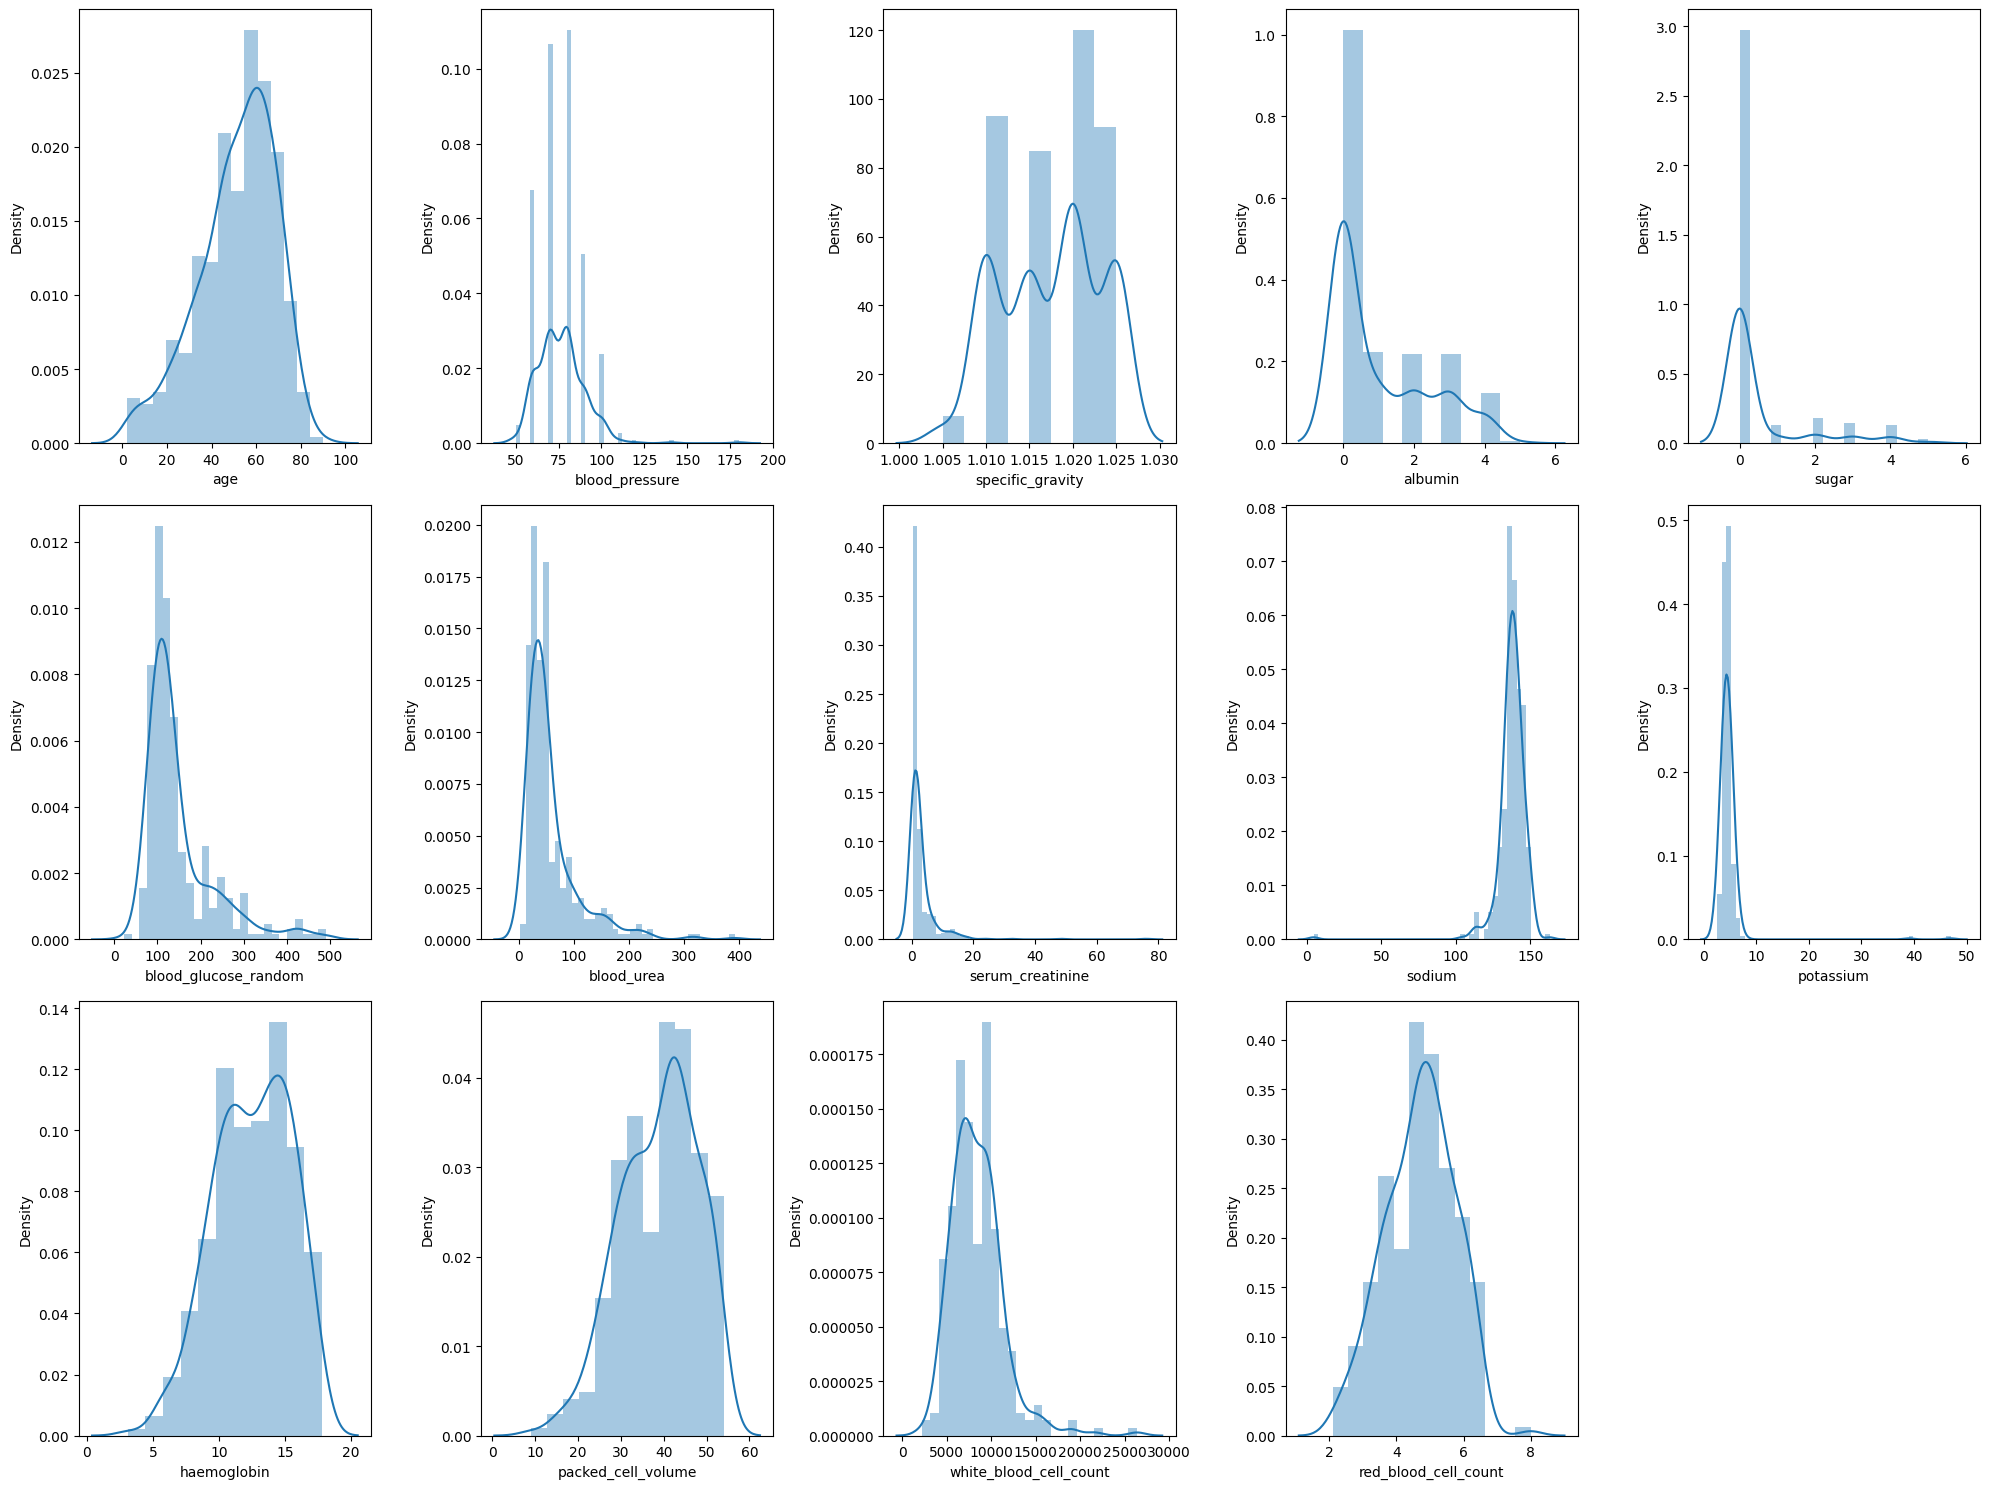

In [101]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [102]:
df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [103]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [104]:
def fill_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [105]:
for col in num_cols:
    fill_mode(col)

In [106]:
for col in cat_cols:
    fill_mode(col)

In [107]:
df.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [108]:
print(df.columns)

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')


In [109]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [110]:
for col in cat_cols:
    print(df[col])

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: red_blood_cells, Length: 400, dtype: int64
0      1
1      1
2      1
3      0
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: pus_cell, Length: 400, dtype: int64
0      0
1      0
2      0
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: pus_cell_clumps, Length: 400, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: bacteria, Length: 400, dtype: int64
0      1
1      0
2      0
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: hypertension, Length: 400, dtype: int64
0      1
1      0
2      1
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: diabetes_mellitus, Length: 400, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: coronary_artery_diseas

In [111]:
y=df['class']

In [112]:
X = df.drop('class', axis=1)

In [113]:
selected = ['serum_creatinine', 'peda_edema', 'pus_cell', 'appetite', 'haemoglobin', 'albumin', 'packed_cell_volume', 'diabetes_mellitus', 'specific_gravity', 'hypertension']
unselected = list(set(X.columns) - set(selected))

X_selected = X.drop(unselected, axis = 1)


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 42)

In [116]:
X_selected

,specific_gravity,albumin,pus_cell,serum_creatinine,haemoglobin,packed_cell_volume,hypertension,diabetes_mellitus,appetite,peda_edema
0,1.020,1.0,1,1.2,15.4,44.0,1,1,0,0
1,1.020,4.0,1,0.8,11.3,38.0,0,0,0,0
2,1.010,2.0,1,1.8,9.6,31.0,0,1,1,0
3,1.005,4.0,0,3.8,11.2,32.0,1,0,1,1
4,1.010,2.0,1,1.4,11.6,35.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
395,1.020,0.0,1,0.5,15.7,47.0,0,0,0,0
396,1.025,0.0,1,1.2,16.5,54.0,0,0,0,0
397,1.020,0.0,1,0.6,15.8,49.0,0,0,0,0
398,1.025,0.0,1,1.0,14.2,51.0,0,0,0,0


In [117]:
X_selected.shape[1]

10

In [118]:
print('X train shape: ',X_train.shape)
print('y train shape: ',y_train.shape)
print('X test shape: ',X_test.shape)
print('y test shape: ',y_test.shape)

X train shape:  (320, 10)
y train shape:  (320,)
X test shape:  (80, 10)
y test shape:  (80,)


In [119]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (X_selected.shape[1],)),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer = opt, loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 10)                0         
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
history = model.fit(X_train, y_train,
                              validation_split=0.2,
                              epochs = 200, batch_size = 32,
                              )

Epoch 1/200
8/8 [==============================] - 2s 38ms/step - loss: 3.8032 - accuracy: 0.6250 - val_loss: 3.9350 - val_accuracy: 0.5938
Epoch 2/200
8/8 [==============================] - 0s 10ms/step - loss: 3.2982 - accuracy: 0.6250 - val_loss: 3.3703 - val_accuracy: 0.5938
Epoch 3/200
8/8 [==============================] - 0s 11ms/step - loss: 2.8037 - accuracy: 0.6250 - val_loss: 2.8393 - val_accuracy: 0.5938
Epoch 4/200
8/8 [==============================] - 0s 11ms/step - loss: 2.3426 - accuracy: 0.6250 - val_loss: 2.3375 - val_accuracy: 0.5938
Epoch 5/200
8/8 [==============================] - 0s 11ms/step - loss: 1.9062 - accuracy: 0.6250 - val_loss: 1.8763 - val_accuracy: 0.5938
Epoch 6/200
8/8 [==============================] - 0s 11ms/step - loss: 1.5034 - accuracy: 0.6250 - val_loss: 1.4614 - val_accuracy: 0.5938
Epoch 7/200
8/8 [==============================] - 0s 11ms/step - loss: 1.1736 - accuracy: 0.6250 - val_loss: 1.1020 - val_accuracy: 0.5938
Epoch 8/200
8/8 [===

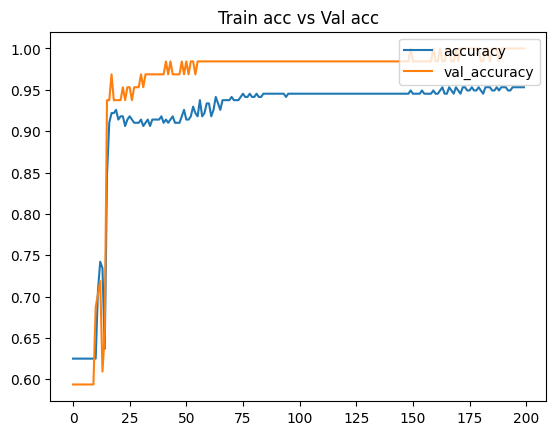

In [121]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(len(loss))

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
plt.title('Train acc vs Val acc')
plt.show()

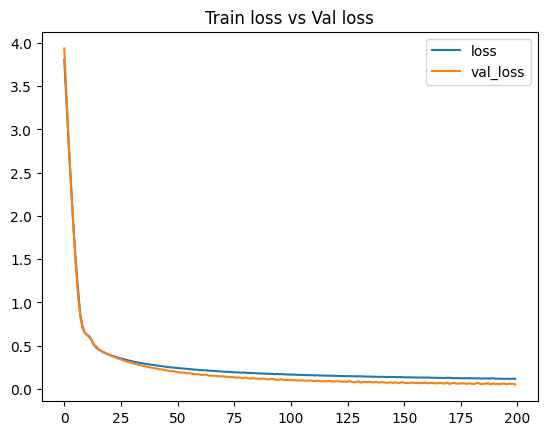

In [122]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Train loss vs Val loss')
plt.show()

In [123]:
from keras.layers import Dropout
dropout_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (X_selected.shape[1],)),
    Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'relu'),
    Dropout(0.2),
    tf.keras.layers.Dense(5, activation = 'relu'),
    Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
dropout_model.compile(optimizer = opt, loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 10)                0         
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
dropout_history = dropout_model.fit(X_train, y_train,
                              validation_split=0.2,
                              epochs = 200, batch_size = 32,
                              )

Epoch 1/200
8/8 [==============================] - 1s 30ms/step - loss: 2.9627 - accuracy: 0.5391 - val_loss: 2.4234 - val_accuracy: 0.5781
Epoch 2/200
8/8 [==============================] - 0s 10ms/step - loss: 2.8346 - accuracy: 0.5273 - val_loss: 2.1276 - val_accuracy: 0.5781
Epoch 3/200
8/8 [==============================] - 0s 6ms/step - loss: 2.2816 - accuracy: 0.5547 - val_loss: 1.8607 - val_accuracy: 0.5781
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 2.0932 - accuracy: 0.5703 - val_loss: 1.6204 - val_accuracy: 0.5781
Epoch 5/200
8/8 [==============================] - 0s 6ms/step - loss: 1.8706 - accuracy: 0.5273 - val_loss: 1.4001 - val_accuracy: 0.5781
Epoch 6/200
8/8 [==============================] - 0s 9ms/step - loss: 2.0740 - accuracy: 0.4883 - val_loss: 1.1992 - val_accuracy: 0.5781
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 1.4541 - accuracy: 0.5547 - val_loss: 1.0253 - val_accuracy: 0.5625
Epoch 8/200
8/8 [========

In [125]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

3/3 [==============================] - 0s 4ms/step - loss: 0.0767 - accuracy: 0.9750
Test accuracy: 0.9750000238418579


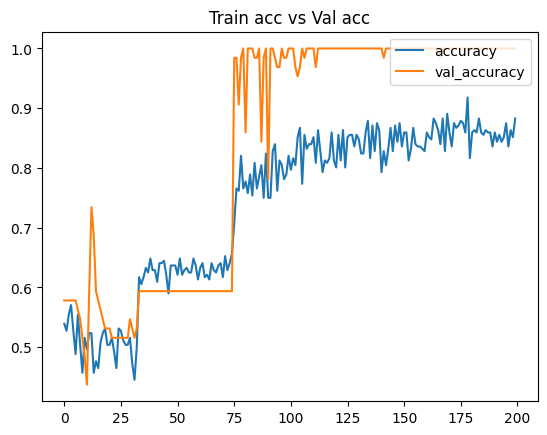

In [126]:
loss = dropout_history.history['accuracy']
val_loss = dropout_history.history['val_accuracy']
epochs = range(len(loss))

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
plt.title('Train acc vs Val acc')
plt.show()

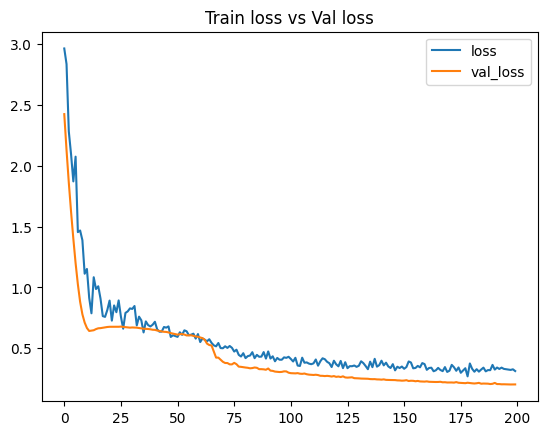

In [127]:
loss = dropout_history.history['loss']
val_loss = dropout_history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Train loss vs Val loss')
plt.show()